# Roller Coasters

Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today we'll be taking control back and visualizing data covering international roller coaster rankings and roller coaster statistics.

Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively.

## Load the ranking data

In [128]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# load rankings data
GTAW_Wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
GTAW_Steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

Check the **GTAW Wood** data:

In [129]:
# Rename columns
GTAW_Wood.columns = [x.replace(' ','_').lower() for x in GTAW_Wood.columns]
GTAW_Wood.head(3)

,rank,name,park,location,supplier,year_built,points,year_of_rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013


In [130]:
# Check type of columns is as expected
GTAW_Wood.dtypes

rank             int64
name            object
park            object
location        object
supplier        object
year_built       int64
points           int64
year_of_rank     int64
dtype: object

In [131]:
# Check for duplicated rows
GTAW_Wood.duplicated().sum()

0

In [132]:
# Check for missing data
GTAW_Wood.isna().sum()

rank            0
name            0
park            0
location        0
supplier        1
year_built      0
points          0
year_of_rank    0
dtype: int64

In [133]:
GTAW_Wood[GTAW_Wood.supplier.isna()]

,rank,name,park,location,supplier,year_built,points,year_of_rank
125,46,Grizzly (KD),Kings Dominion,"Doswell, Va.",NaN,1982,81,2017


Check the **GTAW Steel** data:

In [134]:
# Rename columns
GTAW_Steel.columns = [x.replace(' ','_').lower() for x in GTAW_Wood.columns]
GTAW_Steel.head(3)

,rank,name,park,location,supplier,year_built,points,year_of_rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013


In [135]:
# Check type of columns is as expected
GTAW_Steel.dtypes

rank             int64
name            object
park            object
location        object
supplier        object
year_built       int64
points           int64
year_of_rank     int64
dtype: object

In [136]:
# Check for duplicated rows
GTAW_Steel.duplicated().sum()

0

In [137]:
# Check for missing data
GTAW_Steel.isna().sum()

rank            0
name            0
park            0
location        0
supplier        0
year_built      0
points          0
year_of_rank    0
dtype: int64

There's no missing data for *Steel roller coasters*. 

## Let's create some plotting function to visualise the rankings of roller coasters: 

**Rankings over time for 1 roller coaster:**

In [138]:
def rollerCoasterRankingPlot(name,park,dataframe):
    RC_df = dataframe[(dataframe.name == name) & (dataframe.park == park)]
    
    fig, ax = plt.subplots()
    ax.plot(RC_df["year_of_rank"], RC_df["rank"], marker='o')
    ax.set_xticks(RC_df['year_of_rank'].values)
    ax.set_yticks(RC_df['rank'].values)
    ax.invert_yaxis()
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Rank", fontsize=12)
    plt.title("{} Rankings".format(name))
    plt.show()
    plt.clf()

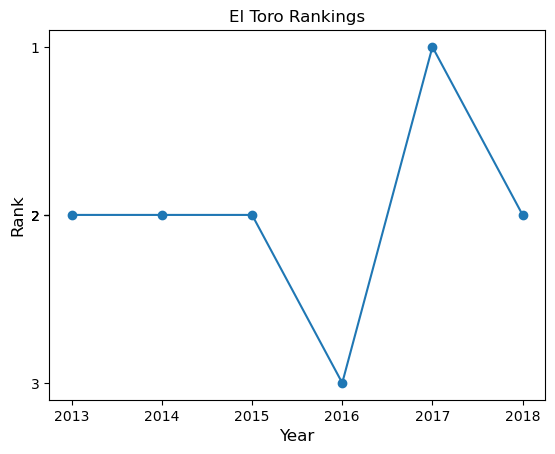

<Figure size 640x480 with 0 Axes>

In [139]:
# Create a plot of El Toro ranking:
rollerCoasterRankingPlot("El Toro", "Six Flags Great Adventure", GTAW_Wood)

**Rankings over time for 2 roller coaster:**

In [140]:
def rollerCoasterRankingPlot_2(name1,park1,name2,park2,dataframe):
    RC1_df = dataframe[(dataframe.name == name1) & (dataframe.park == park1)]
    RC2_df = dataframe[(dataframe.name == name2) & (dataframe.park == park2)]
    
    fig, ax = plt.subplots()
    ax.plot(RC1_df["year_of_rank"], RC1_df["rank"], marker ='o')
    ax.plot(RC2_df["year_of_rank"], RC2_df["rank"], marker ='o')
    ax.set_xticks(RC1_df['year_of_rank'].values)
    ax.set_yticks(list(set(RC1_df["rank"]) | set(RC2_df["rank"])))
    ax.invert_yaxis()
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Rank", fontsize=12)
    labels = [name1, name2]
    plt.legend(labels)
    plt.title("{} vs {} Rankings".format(name1,name2))
    plt.show()
    plt.clf()

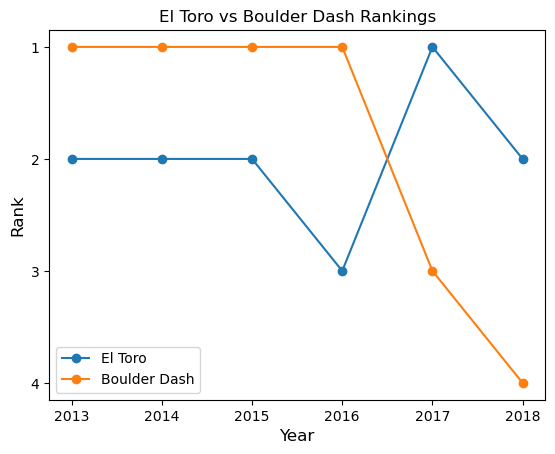

<Figure size 640x480 with 0 Axes>

In [141]:
# Create a plot of El Toro and Boulder Dash roller coasters
rollerCoasterRankingPlot_2("El Toro", "Six Flags Great Adventure", \
                           "Boulder Dash", "Lake Compounce", GTAW_Wood)

**Ranking of the top `n` ranked roller coasters over time:**

In [142]:
def rollerCoasterRankingPlot_n(n,dataframe):
    RC_df = dataframe[dataframe["rank"] <= n]
    RC_names = pd.unique(RC_df.name)
 
    fig, ax = plt.subplots()
    
    for i in range(len(RC_names)):
        RC = RC_df[RC_df.name == RC_names[i]]
        ax.plot(RC["year_of_rank"], RC["rank"], marker ='o')
        ax.set_xticks(RC_df['year_of_rank'].values)
        ax.set_yticks(RC_df['rank'].values)
        ax.invert_yaxis()
        
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Rank", fontsize=12)
    plt.legend(RC_names, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("TOP {} Rankings".format(n))
    plt.show()
    plt.clf()

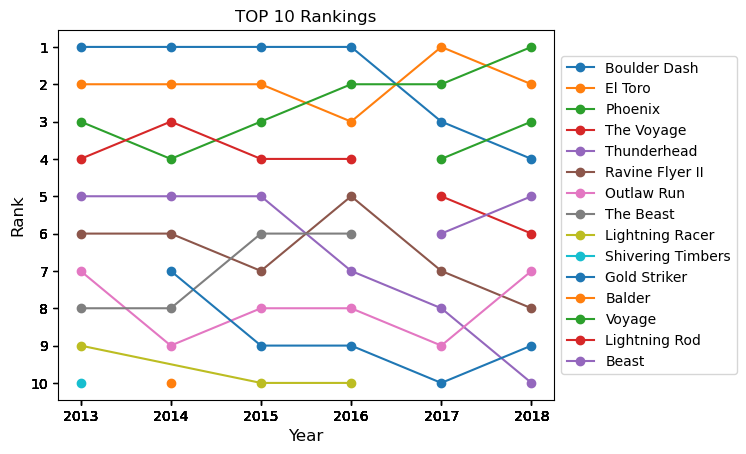

<Figure size 640x480 with 0 Axes>

In [143]:
# Create a plot of top 10 GTAW Wood rankings over time
rollerCoasterRankingPlot_n(10,GTAW_Wood)

## Let's now look at roller coaster characteristics

[Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`.

Here we'll focus on the numerical value in the dataset - which represent the roller coasters' characteristics: 
* `speed`
* `height`
* `length`
* `num_inversions`

In [144]:
# Load the data extracted
RC_data = pd.read_csv('roller_coasters.csv')

In [145]:
# Rename columns
RC_data.columns = [x.replace(' ','_').lower() for x in RC_data.columns]
RC_data.head(3)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating


In [146]:
# Check type of columns is as expected
RC_data.dtypes

name               object
material_type      object
seating_type       object
speed             float64
height            float64
length            float64
num_inversions    float64
manufacturer       object
park               object
status             object
dtype: object

In [147]:
# Check & remove duplicated rows
RC_data[RC_data.duplicated()]
RC_data = RC_data.drop_duplicates()

In [148]:
# Create a missing data information table
missing_info = RC_data.isnull().sum().to_frame(name='Missing Values')
missing_info['Percentage Missing'] = (missing_info['Missing Values'] / len(RC_data)) * 100
missing_info = missing_info.sort_values(by='Missing Values', ascending=False)

missing_info

,Missing Values,Percentage Missing
speed,1316,47.100931
height,1128,40.372226
length,1119,40.050107
num_inversions,397,14.209019
name,3,0.107373
material_type,0,0.000000
seating_type,0,0.000000
manufacturer,0,0.000000
park,0,0.000000
status,0,0.000000


**Let's take a look at the missing data**

The roller coaster with missing names also display 0 for all numerical info, so we'll drop these rows:

In [149]:
# If we want to see which rows this applies to: 
RC_data[RC_data.name.isna()]

# Drop rows
RC_data = RC_data.dropna(subset=['name'])

As we are interested in the numerical columns, we can remove rows were all 4 numerical columns don't have data:

In [150]:
# If we want to see which rows this applies to: 
RC_data[RC_data[['speed', 'height', 'length', 'num_inversions']].isna().all(axis=1)]

# Drop rows where all specified columns have NaN values
RC_data = RC_data.dropna(subset=['speed', 'height', 'length', 'num_inversions'], how='all')
RC_data = RC_data.reset_index(drop=True)

In [151]:
RC_data.describe()

,speed,height,length,num_inversions
count,1475.000000,1663.000000,1672.000000,2394.000000
mean,70.245424,26.786530,607.235048,0.813283
std,28.190007,35.030133,393.354796,1.655133
min,0.000000,0.000000,-1.000000,0.000000
25%,47.000000,13.000000,335.000000,0.000000
50%,72.000000,23.000000,500.000000,0.000000
75%,88.000000,35.000000,840.000000,1.000000
max,240.000000,902.000000,2920.000000,14.000000


Remove the outlier row with a `length`of **-1**:

In [152]:
RC_data = RC_data[RC_data.length >= 0]

We'll make some assumptions before we continue: 
* If a roller coaster as a *NaN* value for some of its metric but not all, we'll keep the row. We'll assuming that a *NaN* for one metric doesn't mean that the other metrics are inaccurate. We'll make sure to make a note of the proportion of *NaN* associated with each metric when we visualise the data (see below)
* `height`and `num_inversions` can take 0 values, however `speed`and `height` can't possibly be 0 for a roller coaster. To make sure this doesn't skew our visualisation will convert 0 to *NaN* for these two metrics
* Lastly, we'll drop rows which have **0** for all metrics (this only applies to 8 rows, therefore shouldn't significantly impact our analysis of `height`and `num_onversions`

In [153]:
# Rows where all metrics are equal to 0:
RC_data[(RC_data.speed == 0) & (RC_data.height == 0) & (RC_data.length == 0) & (RC_data.num_inversions == 0)]

# Drop rows
RC_data = RC_data.drop(RC_data[(RC_data.speed == 0) & (RC_data.height == 0) & \
    (RC_data.length == 0) & (RC_data.num_inversions == 0)].index)

In [154]:
import numpy as np

# Convert convert 0 value to NaN for speed and height columns 
RC_data['speed'] = RC_data['speed'].replace(0, np.nan)
RC_data['length'] = RC_data['length'].replace(0, np.nan)

Finally, following best practice, we'll reset the dataframe's inde

In [155]:
RC_data = RC_data.reset_index(drop=True)

In [156]:
RC_data.describe()

,speed,height,length,num_inversions
count,1359.000000,1514.000000,1661.000000,1557.000000
mean,71.415747,27.385073,611.257074,1.102762
std,27.230404,36.218169,391.526451,1.877953
min,4.000000,0.000000,4.000000,0.000000
25%,50.000000,14.000000,335.000000,0.000000
50%,75.000000,23.500000,500.000000,0.000000
75%,89.000000,35.000000,841.000000,2.000000
max,240.000000,902.000000,2920.000000,14.000000


**We've made a good start to cleaning and understanding the data from *Captain Coaster*. We can see from the describe table above that some values of `speed`and `length`remain low (likely reporting/mesurement errors. We'll carry on with our visualisation for now and see if any trends emerge.**

## Let's create some plotting function to visualise the distribution of roller coaster characterisitics

**Histogram of each metric reference in the `RC_data`dataframe**: 

In [157]:
def rollerCoasterHistogram(dataframe,metric):
    metric_min = min(dataframe[metric])
    metric_max = max(dataframe[metric])
    metric_nan_count = dataframe[metric].isna().sum()
    dataframe_len = dataframe.shape[0]
    print("Minimum is: {} unit".format(metric_min))
    print("Maximum is: {} unit".format(metric_max))
    print("NaN count is {} for a df size of {}".format(metric_nan_count,dataframe_len))
    
    fig, ax = plt.subplots()
    if (metric_max-metric_min) < 50: b = int(metric_max-metric_min) 
    else: b = 50
    plt.hist(dataframe[metric].dropna(), range=(metric_min,metric_max), bins=b)
    plt.xlabel(metric)
    plt.ylabel("RC Count")
    plt.title('Histogram of RC {} (in {} unit intervals)'.format(metric,(metric_max-metric_min)/b))
    plt.grid(linestyle=':', linewidth=1)
    plt.show()
    plt.clf()

Minimum is: 4.0 unit
Maximum is: 240.0 unit
NaN count is 304 for a df size of 1663


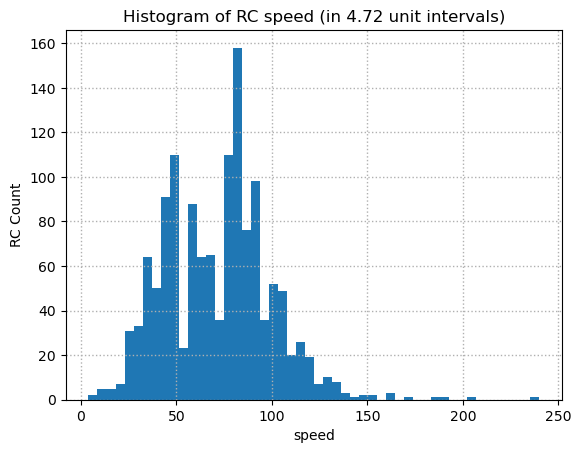

Minimum is: 4.0 unit
Maximum is: 2920.0 unit
NaN count is 2 for a df size of 1663


<Figure size 640x480 with 0 Axes>

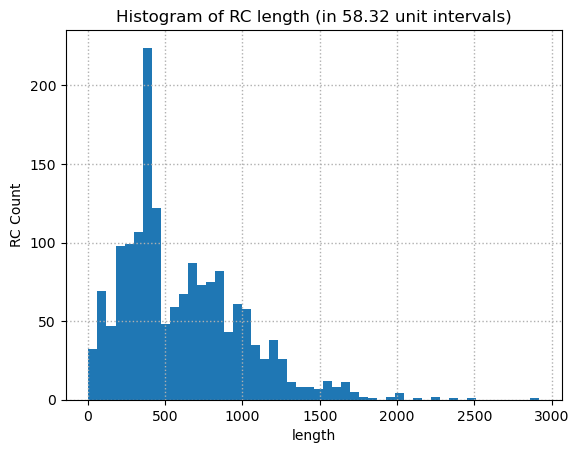

Minimum is: 0.0 unit
Maximum is: 14.0 unit
NaN count is 106 for a df size of 1663


<Figure size 640x480 with 0 Axes>

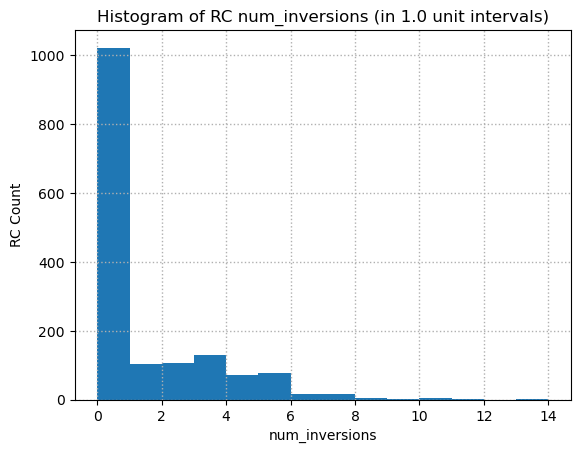

Minimum is: 0.0 unit
Maximum is: 139.0 unit
NaN count is 0 for a df size of 1511


<Figure size 640x480 with 0 Axes>

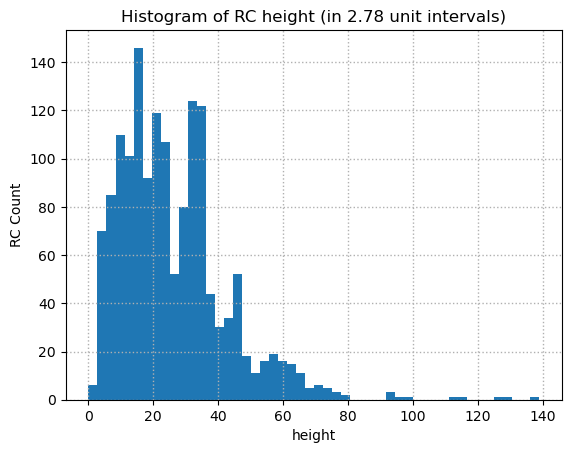

<Figure size 640x480 with 0 Axes>

In [158]:
# Create histogram of roller coaster speed
rollerCoasterHistogram(RC_data,"speed")
    
# Create histogram of roller coaster length
rollerCoasterHistogram(RC_data,"length")

# Create histogram of roller coaster number of inversions
rollerCoasterHistogram(RC_data,"num_inversions")

# Create a histogram of roller coaster height
RC_data_h_adj = RC_data[RC_data['height'] < 200]
rollerCoasterHistogram(RC_data_h_adj,"height")

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

**Bar chart ranking the roller coasters at a given park by number of inversions**: 

In [159]:
def rollerCoasterInversionsPerPark(dataframe,park_name):
    RC_park = dataframe[dataframe["park"] == park_name] \
              .sort_values('num_inversions', ascending=False)
        
    fig, ax = plt.subplots()
    plt.bar(range(len(RC_park['num_inversions'])),RC_park['num_inversions'])
    ax.set_xticks(range(len(RC_park.name)))
    ax.set_xticklabels(RC_park.name,rotation=90)
    plt.xlabel("Roller Coasters")
    plt.ylabel("Number of inversion")
    plt.title(park_name)
    
    plt.show()
    plt.clf()

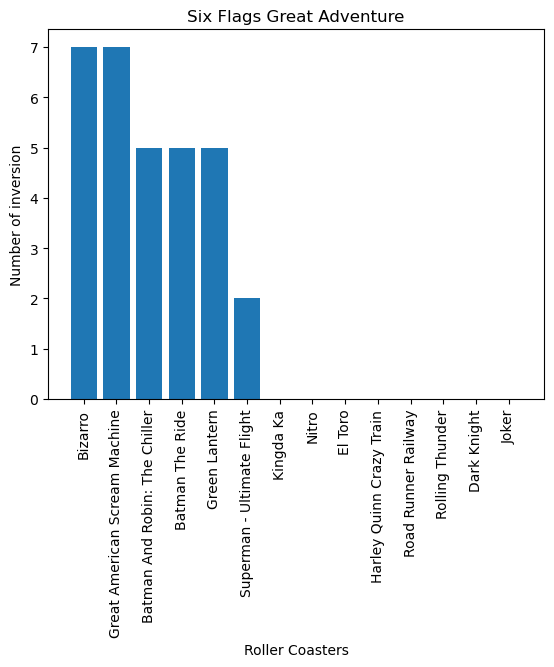

<Figure size 640x480 with 0 Axes>

In [160]:
# Create barplot of inversions by roller coasters at "Six Flags Great Adventure":
rollerCoasterInversionsPerPark(RC_data,"Six Flags Great Adventure")

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

**Pie chart showing the proportion of operating/closed-down roller coasters in the dataset**: 

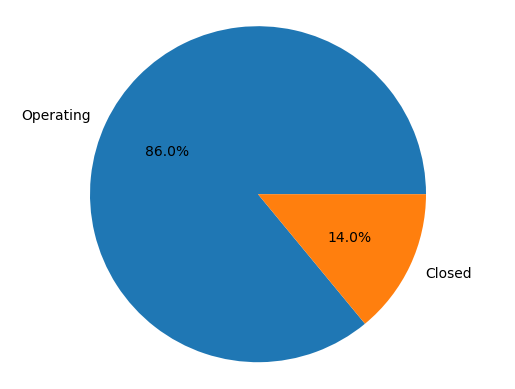

<Figure size 640x480 with 0 Axes>

In [161]:
def rollerCoasterOperationStatus(dataframe):
    RC_operating = dataframe[dataframe["status"] == 'status.operating']
    RC_closed_def = dataframe[dataframe["status"] == 'status.closed.definitely']
    status_count = [len(RC_operating),len(RC_closed_def)]
    
    plt.pie(status_count,labels=["Operating","Closed"],autopct="%.1f%%")
    plt.axis('equal')
    plt.show()
    plt.clf()

# Create pie chart of roller coasters
rollerCoasterOperationStatus(RC_data)

**We can also look at the correlation between the different metrics**:

In [162]:
def rollerCoasterScatter(dataframe,metric1,metric2):
    if metric1 == "height":
        RC_df = dataframe[dataframe[metric1] < 200]
    elif metric2 == "height":
        RC_df = dataframe[dataframe[metric2] < 200]
    else:
        RC_df = dataframe
                
    fig, ax = plt.subplots()
    plt.scatter(RC_df[metric1],RC_df[metric2])
    plt.xlabel(metric1)
    plt.ylabel(metric2)
    plt.title("Comparison of RC: {} vs {}".format(metric1,metric2))

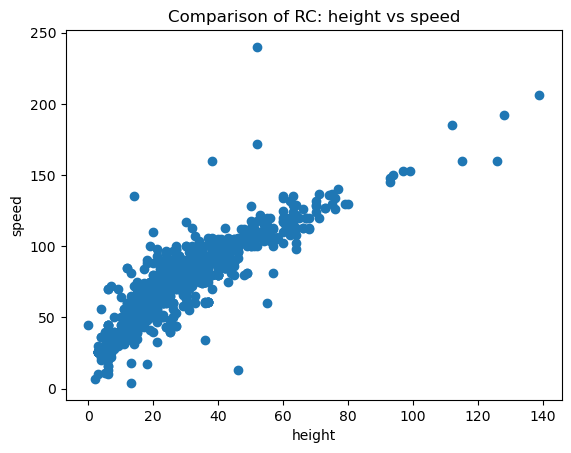

In [163]:
# Create a scatter plot of roller coaster height by speed
rollerCoasterScatter(RC_data,"height","speed")

### --- This is the end of the Analysis ---

**Other aspects we could have looked at**:
* What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
 * Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
* Do amusement parks have any specialties?

Maybe worth looking at in the future. 